In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

# Save profiles as timeseries with fully interpolated MJD "timegrid"

In [2]:
profs = np.loadtxt('../J0332_profile.txt')
mjd = np.loadtxt('../J0332_MJD.txt')

nbins = 714
p = 0.7141571200 #seconds
tspan = int(mjd.max() - mjd.min())

In [20]:
#create equally spaced time axis for plotting wavelet power spectrum
timegrid = []
start_mjd = mjd[0]

for i in range(tspan):
    timegrid += np.linspace(start_mjd+i, start_mjd + i + p/86400, nbins).tolist()
    #this doesn't correct for all
    #milliseconds in day, but not necessary if want to just observe periodic patterns

timegrid = np.array(timegrid)

In [81]:
#create timeseries corresponding to timegrid, 0 value where no obs.
timeser = np.zeros_like(timegrid)
prof_ct = 0

for t in range(len(timegrid)):
    if timegrid[t] in mjd:
        timeser[t:t+nbins] = profs[prof_ct]
        prof_ct += 1

Text(0.5, 0, 'MJD')

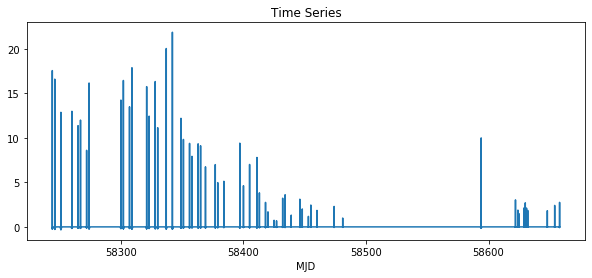

In [84]:
fig = plt.figure(figsize=(10,4))
plt.plot(timegrid, timeser)
plt.title('Time Series')
plt.xlabel('MJD')

In [85]:
np.savetxt('../R_wavelet/J0332_timeser.txt', timeser)
np.savetxt('../R_wavelet/J0332_timegrid.txt', timegrid)

# Or save timeser without MJD gaps

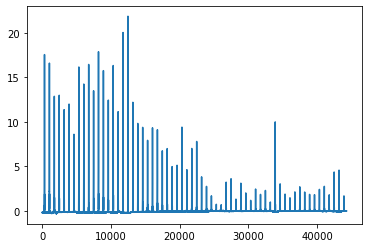

In [5]:
timeser = np.hstack(profs)
plt.plot(timeser)

In [6]:
np.savetxt('../R_analysis/J0332_nogap_timeser.txt', timeser)